# Working with Data: Visualizing CSVs
## Introduction
So far, we've done some work on reading data into python and visualizing it. We know that Comma-Separated Value (CSV) formatted text is something that we can read into python readily using modules like `pandas`. (If you're really looking to create a CSV out of some messy text, the `csv` module in python can also be a good choice). Here we'll review some of the important basics for the `pandas` module.
# `pandas`: The Python Data Analysis Library
The `pandas` comes with a bunch of super useful functions for loading, subsetting, and visualizing datas. It is documented [here](https://pandas.pydata.org).
To get more comfortable working in `pandas` we're going to practice loading in CSVs from different places. Let's start with the following CSV where I've stored some details about a recent grocery run:

      food,color,grams  
      apple,red,250  
      chicken,pink,500  
      kale,green,200  
      bread,brown,300  

Here, I've given my grocery list a header labelling the value placed in each column. Data won't always have headers, and it's important to keep in mind that `pandas` assumes that a CSV has a header by default.

One of the major features of pandas is the DataFrame object, which is a nice way of representing tabular data (mixed data with a column for each variable). We can load our CSV shopping list into a DataFrame using the `pd.read_csv` function:

In [1]:
import pandas as pd

data = """
food,color,grams
apple,red,250
chicken,pink,500
kale,green,200
bread,brown,300
"""

df = pd.read_csv(pd.compat.StringIO(data))
print(df)

      food  color  grams
0    apple    red    250
1  chicken   pink    500
2     kale  green    200
3    bread  brown    300


We can index DataFrames by row and column names (or boolean arrays) by accessing the object's `.loc` field, and we can index by integers by using the `.iloc` field. But under the hood, DataFrames work a little bit like fancy dictionaries, with column heads as keys:


In [2]:
print("The food column:\n", df[['food']]) # get the "food" column
print("The food column part 2:\n",df.loc[:,'food']) # also get the food column
print("The food column using numbers:\n",df.iloc[:,0] ) # once again, food
print("Heavy foods:\n",df.loc[df['grams'] >= 300,:])# rows where grams >= 300


The food column:
       food
0    apple
1  chicken
2     kale
3    bread
The food column part 2:
 0      apple
1    chicken
2       kale
3      bread
Name: food, dtype: object
The food column using numbers:
 0      apple
1    chicken
2       kale
3      bread
Name: food, dtype: object
Heavy foods:
       food  color  grams
1  chicken   pink    500
3    bread  brown    300


`pandas` lets use the `read_csv` function to read in data in csv format in a number of ways. Above we used the `compat.StringIO` function to convert a CSV string into a format that pandas can read directly. In previous sessions, and in the next section, we see `read_csv` to read in a file stored locally (on your computer, for example). `pandas` also has the neat feature that it can read a CSV stored somewhere online!
We can do this with our pokemon data used in previous sessions:

In [3]:
pokemon_df = pd.read_csv("https://raw.githubusercontent.com/n2cholas/pokemon-analysis/master@%7B2019-03-13%7D/pokemon-data.csv", sep = ';')
pokemon_df.head()


,Name,Types,Abilities,Tier,HP,Attack,Defense,Special Attack,Special Defense,Speed,Next Evolution(s),Moves
0,Abomasnow,"['Grass', 'Ice']","['Snow Warning', 'Soundproof']",PU,90,92,75,92,85,60,[],"['Ice Punch', 'Powder Snow', 'Leer', 'Razor Le..."
1,Abomasnow-Mega,"['Grass', 'Ice']",['Snow Warning'],NUBL,90,132,105,132,105,30,[],"['Ice Punch', 'Powder Snow', 'Leer', 'Razor Le..."
2,Abra,['Psychic'],"['Inner Focus', 'Magic Guard', 'Synchronize']",LC,25,20,15,105,55,90,['Kadabra'],"['Teleport', 'Ally Switch', 'Barrier', 'Encore..."
3,Absol,['Dark'],"['Justified', 'Pressure', 'Super Luck']",PU,65,130,60,75,60,75,[],"['Perish Song', 'Future Sight', 'Me First', 'R..."
4,Absol-Mega,['Dark'],['Magic Bounce'],RUBL,65,150,60,115,60,115,[],"['Perish Song', 'Future Sight', 'Me First', 'R..."


Note that back in our activity, we broke down a few ways to clean up this pokemon data. One of them we have to include: the `sep` argument, which tells `read_csv` what separates each column in our table. The remaining arguments we had forced the values in each column to be interpreted as we wanted them. Some of our columns contain lists (Types, Abilities, Next Evolution(s), and Moves), but `pandas` is interpreting these as strings:

In [4]:
print(pokemon_df.loc[pokemon_df['Name'] == 'Charmander','Next Evolution(s)'].values[0])
print(type(pokemon_df.loc[pokemon_df['Name'] == 'Charmander','Next Evolution(s)'].values[0]))

['Charmeleon']
<class 'str'>


For now we're not going to worry about that, since we're not going to use these columns!

You can look back at [week 2's main activity](https://mybinder.org/v2/gh/claire-bomkamp/UBC-LTS-Code/master?filepath=Pokemon%20Dataset.ipynb) to review how to make the types of each column explicit.

# Exploring Black Friday Sales Data.

The dataset we'll use to practice is a sample of sales data for a store on Black Friday. It has plenty of information to help us break down our data into groups, which allows to ask more targeted questions.

You can see what other people have done with this data on [kaggle](https://www.kaggle.com/mehdidag/black-friday/kernels). Each 'kernel' is a Jupyter notebook filled with someone's analysis. One popular one similar to this activity can be seen [here](https://www.kaggle.com/shamalip/black-friday-data-exploration).

## Reading in the Data
Since our dataset is fairly large, we're going to keep it saved as a zip file to save space. Even though we're running this notebook using magical cloud tools, you still have something that looks like the file system on your own computer. Click `File` and then `Open` to see what files you have access to.

Luckily, since we know that our zip file is just a compressed CSV, we can still use the `pd.read_csv` function to read it into a DataFrame! Let's peak at the values with `head`:

In [5]:
black_friday = pd.read_csv("./black-friday.zip")

black_friday.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


We see that for each unique user (denoted by `User_ID`), we have some general information defining who they are. In marketing, we might be interested in the amount of money a certain age group is willing to spend in one trip. We can summarize variables for each unique `User_ID` by using the `groupby` function. Let's look at the total amount spent by each user:


In [6]:
grouped_data = black_friday.groupby(["User_ID"])
grouped_data[["Purchase"]].sum().head()


,Purchase
User_ID,
1000001,333481
1000002,810353
1000003,341635
1000004,205987
1000005,821001


## Practing Plotting with `matplotlib` and `seaborn`
Visualization is an important step in learning about any new dataset. At first you might think that you can get every thing from summary data alone. For example, for two measurments we have on our data, we might want to know each measurment's average value, the amount of spread around the average values for each measurment, and how similar the two measurements are to one another. We call these summary statistics mean (average), standard deviation (spread around the average), and correlation (similarity between measures). These statistics tell us some important properties of our data. However, data can be sneaky! Just look at the [Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats) below:

In [7]:
%%html
<img src="./DataSaurus.gif">


All of the plots above have the same mean (average), standard deviation (spread) and correlation value (similarity) for x and y! As you can see here, it's not until we actually see the different plots that we realize high-level, interesting patterns in our data. We can start asking these types of questions with our Black Friday shopping data too.

Let's try to see how much each age group spent, split by their gender:


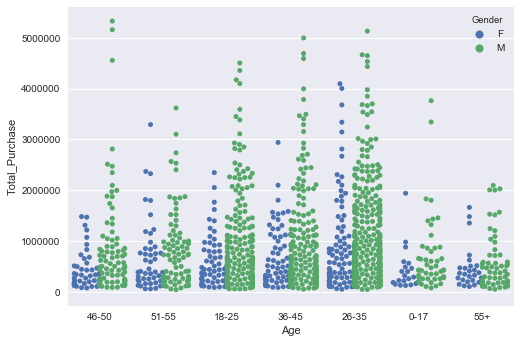

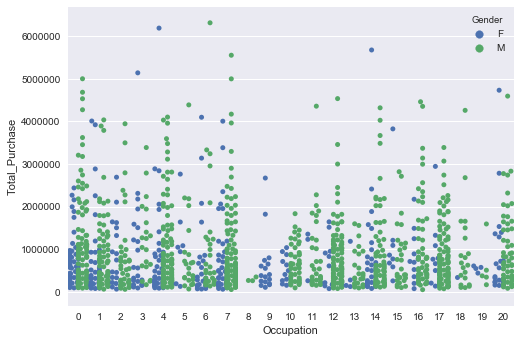

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# First let's get the total amount spent by each customer
black_friday["Total_Purchase"] = grouped_data['Purchase'].transform('sum')
plot_data = black_friday[
    ["User_ID",
     "Gender",
     "Age",
     "Occupation",
     "Total_Purchase"]]
plot_data = plot_data.drop_duplicates().reindex()
plot_data.head()
sns.set()

sns.swarmplot('Age', 'Total_Purchase', hue='Gender', split=True, data=plot_data.sample(frac = 0.25))
plt.show()

sns.swarmplot('Occupation', 'Total_Purchase', hue = 'Gender', split=True, data=plot_data.sample(frac = 0.25))
plt.show()


Here we're sampling just a random 25% of the rows in our dataframe (using the `.sample()` command). Swarmplot tends to go slow when it has lots of points to deal with, so this will speed things up a lot!

Just from the plots above, we can already start to see that occupation 8 seems to have the lowest spenders, and that the 0-17 age group spent a similar amount to the 55+ Age range. Try to see if you can get any of the plots [here](https://seaborn.pydata.org/api.html#categorical-plots) to give you a better picture of the data!
We can make our second plot a little more readable by assigning names to each occupation. The dataset we're working with doesn't publish what these occupations are, so for practice let's create a job for each number and put these in a column called 'Job':


In [9]:
job_numbers = sorted(plot_data['Occupation'].unique()) #unique sorted job number
print(job_numbers)
job_names = [
    "Boxer", "Doctor", "Business-person", "Astronaut", "Youtuber", "Biologist",
    "Rocket scientist", "Teacher", "Baker", "Janitor", "Magician", "Author",
    "Statistician", "Engineer", "Diplomat", "Coach", "Jeweler", "Roboticist",
    "Spy", "Programmer", "Chemist"]

# create a mapping from numbers to jobs
mapping = {key: value for (key, value) in zip(job_numbers, job_names)}
print(mapping)

# create a new DataFrame with a Job column for our names
named_plot_data = plot_data.assign(
    Job = [mapping[plot_data['Occupation'].iloc[i]] for i in range(len(plot_data))])

named_plot_data.head()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
{0: 'Boxer', 1: 'Doctor', 2: 'Business-person', 3: 'Astronaut', 4: 'Youtuber', 5: 'Biologist', 6: 'Rocket scientist', 7: 'Teacher', 8: 'Baker', 9: 'Janitor', 10: 'Magician', 11: 'Author', 12: 'Statistician', 13: 'Engineer', 14: 'Diplomat', 15: 'Coach', 16: 'Jeweler', 17: 'Roboticist', 18: 'Spy', 19: 'Programmer', 20: 'Chemist'}


,User_ID,Gender,Age,Occupation,Total_Purchase,Job
0,1000001,F,0-17,10,333481,Magician
4,1000002,M,55+,16,810353,Jeweler
5,1000003,M,26-35,15,341635,Coach
6,1000004,M,46-50,7,205987,Teacher
9,1000005,M,26-35,20,821001,Chemist


Above we did a few things. We first got all the unique job numbers in our DataFrame. Then, we listed out a job name for each number. The third command here is a dictionary comprehension, which we use to create a python dictionary mapping each job number to a name. Lastly, we create use `assign` to create a new DataFrame with a 'Job' column, and use list comprehension to map each occupation number to a job name.

Using this new DataFrame with a 'Job' column, we can now add these names to our second plot:

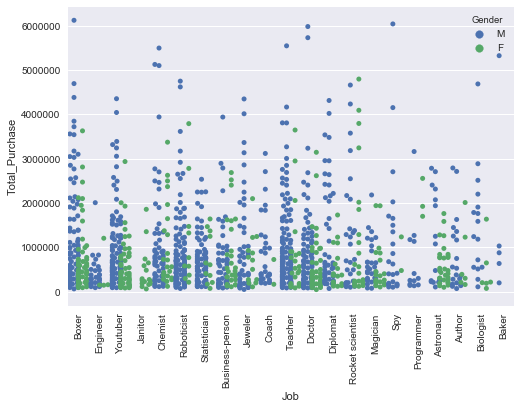

In [10]:
sns.swarmplot('Job', 'Total_Purchase', hue = 'Gender', split=True, data=named_plot_data.sample(frac = 0.25))
plt.xticks(rotation=90)
plt.show()

The `plt.xticks` command is used here to rotate our Job labels so they don't overlap.
## Saving our Modified Data
Now that we're done plotting, we can take our modified DataFrame `named_plot_data` and save it away for later using the `to_csv` method:


In [11]:
named_plot_data.to_csv("./black_friday_plotting.csv")

If you click `File` and then `Open`, you can have a look at the files you have access to. You'll see a new CSV file appear when you run the cell above.